### Import necessary libraries

In [428]:
# librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# módulos de Scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error

### Data Loading and Inspection

In [429]:
# Cargar el archivo CSV
df = pd.read_csv('pisos.csv')

# Mostrar las primeras filas para inspeccionar el dataset
df.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4388\402079931.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pisos.csv')


,Unnamed: 0,summary,description,location,photo,recomendado,price,size,rooms,price/m2,bathrooms,Num Photos,type,region
0,0,Casa en calle Urb. Las Mimosas,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/104/1069_I00...,Recomendado,250.000 €,315 m²,4,793 €/m²,3,31,pisos,a_coruna
1,1,Piso en Milladoiro,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/113/1069_I00...,Recomendado,90.000 €,72 m²,2,1.250 €/m²,1,11,pisos,a_coruna
2,2,Casa en calle La Piedra,NaN,A Ortigueira (Cariño),https://fotos1.imghs.net/nrd//999170/892070610...,Recomendado,50.000 €,92 m²,2,543 €/m²,1,40,pisos,a_coruna
3,3,Casa en Perillo,NaN,Perillo (Oleiros),https://fotos3.imghs.net/nrd/1089/198/1089_XA2...,Recomendado,359.000 €,244 m²,4,1.471 €/m²,3,39,pisos,a_coruna
4,4,Chalet en Urbanización Las Mimosas,NaN,O Milladoiro (Ames),https://fotos5.imghs.net/nrd/1097/754/1097_0_f...,Recomendado,200.430 €,315 m²,4,636 €/m²,3,24,pisos,a_coruna


### Filtering the DataFrame for a Specific Region - Madrid

In [430]:
# Filtrar el DataFrame para conservar solo las filas donde 'region' es 'Madrid'
df = df[df['region'].str.lower().isin(['madrid'])]

# Mostrar valores únicos para verificar los cambios
valores_unicos_actualizados = df['region'].unique()
print(valores_unicos_actualizados)

['madrid']


In [431]:
df.shape

(8661, 14)

### Displaying General Information

In [432]:
# Mostrar información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8661 entries, 74019 to 495056
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8661 non-null   int64 
 1   summary      8661 non-null   object
 2   description  8654 non-null   object
 3   location     8661 non-null   object
 4   photo        8661 non-null   object
 5   recomendado  1708 non-null   object
 6   price        8661 non-null   object
 7   size         8661 non-null   object
 8   rooms        8421 non-null   object
 9   price/m2     8500 non-null   object
 10  bathrooms    8518 non-null   object
 11  Num Photos   8661 non-null   object
 12  type         8661 non-null   object
 13  region       8661 non-null   object
dtypes: int64(1), object(13)
memory usage: 1015.0+ KB


### Data Cleaning Process
##### 1) Remove Unnecessary Columns
##### 2) Clean and Convert Price and Size, Clean Location
##### 3) Inspecting Changes

In [433]:
# Eliminar columnas innecesarias
df.drop(columns=['Unnamed: 0', 'description', 'photo', 'Num Photos', 'recomendado', 'price/m2', 'summary'], inplace=True)

# Quitar símbolos "€ y m²" en 'price' y 'size' y convertir a numérico
df['price'] = pd.to_numeric(df['price'].str.replace('€', '').str.replace('.', ''), errors='coerce')
df['size'] = pd.to_numeric(df['size'].str.replace('m²', '').str.replace('.', ''), errors='coerce')

# Inspeccionar cambios
df


,location,price,size,rooms,bathrooms,type,region
74019,Centro (Colmenar Viejo),225000.0,104.0,4,2.0,pisos,madrid
74020,Meco,190500.0,132.0,3,3.0,pisos,madrid
74021,Centro (Rivas-Vaciamadrid),123000.0,75.0,2,1.0,pisos,madrid
74022,Moralzarzal,330000.0,135.0,4,2.0,pisos,madrid
74023,Núcleo Urbano (Villanueva de la Cañada),199900.0,70.0,2,1.0,pisos,madrid
...,...,...,...,...,...,...,...
495052,Dehesa Vieja-Puente Cultural (San Sebastián de...,172000.0,77.0,1,1.0,lofts,madrid
495053,Arroyos y Tempranales (San Sebastián de los Re...,200000.0,76.0,1,1.0,lofts,madrid
495054,Ciudad Jardín (Distrito Chamartín. Madrid Capi...,485000.0,119.0,3,2.0,lofts,madrid
495055,Embajadores-Lavapiés (Distrito Centro. Madrid ...,480000.0,69.0,2,2.0,lofts,madrid


In [434]:
# Eliminar texto dentro de paréntesis
df['location'] = df['location'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip()

# Mostrar el DataFrame actualizado
df

,location,price,size,rooms,bathrooms,type,region
74019,Centro,225000.0,104.0,4,2.0,pisos,madrid
74020,Meco,190500.0,132.0,3,3.0,pisos,madrid
74021,Centro,123000.0,75.0,2,1.0,pisos,madrid
74022,Moralzarzal,330000.0,135.0,4,2.0,pisos,madrid
74023,Núcleo Urbano,199900.0,70.0,2,1.0,pisos,madrid
...,...,...,...,...,...,...,...
495052,Dehesa Vieja-Puente Cultural,172000.0,77.0,1,1.0,lofts,madrid
495053,Arroyos y Tempranales,200000.0,76.0,1,1.0,lofts,madrid
495054,Ciudad Jardín,485000.0,119.0,3,2.0,lofts,madrid
495055,Embajadores-Lavapiés,480000.0,69.0,2,2.0,lofts,madrid


###  Handling Missing Values (Remove Rows with Null Values)

In [435]:
# Eliminar filas con valores nulos
df = df.dropna(subset=['price', 'location', 'size', 'rooms', 'bathrooms', 'region'])

# Verificar si todavía quedan valores faltantes
print(df.isnull().sum())

location     0
price        0
size         0
rooms        0
bathrooms    0
type         0
region       0
dtype: int64


### Converting Columns to Numeric Format

In [436]:
# Convertir las columnas a formato numérico 
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4388\996306031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4388\996306031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4388\996306031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

### Obtaining Unique Values in the 'type' Column

In [437]:
# Obtener valores únicos en la columna 'type'
unique_types = df['type'].unique()

# Imprimir los valores únicos
print("Valores únicos en 'type':")
print(unique_types)

Valores únicos en 'type':
['pisos' 'casas' 'piso' 'aticos' 'duplexs' 'estudios' 'fincas_rusticas'
 'lofts']


### Replacing 'piso' with 'pisos' in the 'type' Column

In [438]:
# Reemplazar 'piso' por 'pisos' en la columna 'type' sin usar .loc
df['type'] = df['type'].replace('piso', 'pisos')

# Verificar los cambios
print(df['type'].value_counts())

type
pisos              4409
casas              2608
duplexs             751
aticos              452
lofts                70
fincas_rusticas      43
estudios             24
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4388\740019963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].replace('piso', 'pisos')


### Removing Outliers from the Dataset

#### To ensure the integrity and reliability of the analysis, we calculated the Interquartile Range (IQR) for the numerical columns in the dataset and filtered out the outliers.

In [439]:
# Calcular los límites para 'size'
Q1_size = df['size'].quantile(0.25)
Q3_size = df['size'].quantile(0.75)
IQR_size = Q3_size - Q1_size
lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size

# Calcular los límites para 'rooms'
Q1_rooms = df['rooms'].quantile(0.25)
Q3_rooms = df['rooms'].quantile(0.75)
IQR_rooms = Q3_rooms - Q1_rooms
lower_bound_rooms = Q1_rooms - 1.5 * IQR_rooms
upper_bound_rooms = Q3_rooms + 1.5 * IQR_rooms

# Calcular los límites para 'bathrooms'
Q1_bathrooms = df['bathrooms'].quantile(0.25)
Q3_bathrooms = df['bathrooms'].quantile(0.75)
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms
lower_bound_bathrooms = Q1_bathrooms - 1.5 * IQR_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

# Calcular los límites para 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filtrar el DataFrame para eliminar los outliers de todas las columnas
df_cleaned_final = df[
    (df['size'] >= lower_bound_size) & (df['size'] <= upper_bound_size) &
    (df['rooms'] >= lower_bound_rooms) & (df['rooms'] <= upper_bound_rooms) &
    (df['bathrooms'] >= lower_bound_bathrooms) & (df['bathrooms'] <= upper_bound_bathrooms) &
    (df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)
]

df_cleaned_final


,location,price,size,rooms,bathrooms,type,region
74019,Centro,225000.0,104.0,4,2.0,pisos,madrid
74020,Meco,190500.0,132.0,3,3.0,pisos,madrid
74021,Centro,123000.0,75.0,2,1.0,pisos,madrid
74022,Moralzarzal,330000.0,135.0,4,2.0,pisos,madrid
74023,Núcleo Urbano,199900.0,70.0,2,1.0,pisos,madrid
...,...,...,...,...,...,...,...
495038,Parla Este,198000.0,95.0,3,2.0,lofts,madrid
495043,Loeches,158000.0,105.0,3,1.0,lofts,madrid
495050,Ciudalcampo-Fuente del Fresno,233200.0,106.0,2,1.0,lofts,madrid
495054,Ciudad Jardín,485000.0,119.0,3,2.0,lofts,madrid


### Size Column Data Cleaning

In our dataset, we identified and addressed issues related to the `size` column, which represents the size of properties in square meters. The following steps were taken to ensure the data's integrity and relevance:

1. **Outlier Removal**: 
   - We calculated the interquartile range (IQR) for the `size` column to identify outliers. 
   - Using the 1.5 * IQR rule, we filtered out properties that had a `size` less than the lower bound or greater than the upper bound.

2. **Minimum Size Check**:
   - Upon further examination, we noticed that there were properties with a size of only 1 square meter, which seemed unusually low. 
   - To establish a more reasonable threshold, we calculated the minimum common size for the dataset, which was determined to be 55 square meters (5th percentile).

3. **Removal of Small Properties**:
   - We counted how many properties had a size less than 55 square meters. 
   - After confirming the number of small properties, we proceeded to remove these entries from our dataset.

4. **Final Verification**:
   - Post-removal, we verified that no properties remained with a size less than 55 square meters, ensuring the dataset now contains only relevant and appropriately sized properties.

These steps helped us refine the dataset, making it more accurate for subsequent analysis and modeling.


In [440]:
min_common_size = df_cleaned_final['size'].quantile(0.05)  # 5% como ejemplo
print(f"Tamaño mínimo común (5%): {min_common_size}")

Tamaño mínimo común (5%): 55.0


In [441]:
min_common_size = df_cleaned_final['size'].quantile(0.05)  # 5% como ejemplo
print(f"Tamaño mínimo común (5%): {min_common_size}")

Tamaño mínimo común (5%): 55.0


In [442]:
# Contar cuántas viviendas tienen un tamaño menor al tamaño mínimo común
num_small_properties = df_cleaned_final[df_cleaned_final['size'] < 55.0].shape[0]
print(f"Número de viviendas con tamaño menor a 55.0 m²: {num_small_properties}")


Número de viviendas con tamaño menor a 55.0 m²: 277


In [443]:
# Eliminar viviendas con tamaño menor a 55.0 m²
df_cleaned_final = df_cleaned_final[df_cleaned_final['size'] >= 55.0]

# Contar cuántas viviendas quedan después de la eliminación
num_remaining_properties = df_cleaned_final.shape[0]
print(f"Número de viviendas restantes después de eliminar las pequeñas: {num_remaining_properties}")


Número de viviendas restantes después de eliminar las pequeñas: 6296


### Price Column Data Cleaning Summary

- **Minimum Common Price (5th Percentile)**:
  - Calculated the 5th percentile for the `price` column to identify an appropriate lower threshold for property prices.
  - Minimum common price identified: `{min_common_price}`.

- **Identification of Low-Priced Properties**:
  - Counted how many properties had a price below the 5th percentile.
  - Properties priced below `{min_common_price}`: `{cantidad_viviendas_bajo_precio}`.

- **Removal of Properties Below a Threshold**:
  - Removed properties with prices below 105,000 euros to ensure only relevant and representative data were retained.

- **Final Verification**:
  - Verified the number of remaining properties in the dataset after removing the low-priced properties.
  - Total remaining properties: `{len(df_cleaned_final)}`.

This cleaning process improved the dataset by filtering out properties with unusually low prices, ensuring better data quality for analysis.


In [444]:
estadisticas_precio = df_cleaned_final['price'].describe()
print(estadisticas_precio)


count      6296.000000
mean     293630.250953
std      190570.145393
min       23000.000000
25%      153825.000000
50%      235000.000000
75%      375000.000000
max      970000.000000
Name: price, dtype: float64


In [445]:
# Calcular el precio mínimo común (5%)
min_common_price = df_cleaned_final['price'].quantile(0.05)  
print(f"Precio mínimo común (5%): {min_common_price}")

# Contar cuántas viviendas tienen un precio menor al mínimo común
cantidad_viviendas_bajo_precio = len(df_cleaned_final[df_cleaned_final['price'] < min_common_price])
print(f"Cantidad de viviendas que valen menos de {min_common_price}: {cantidad_viviendas_bajo_precio}")


Precio mínimo común (5%): 105000.0
Cantidad de viviendas que valen menos de 105000.0: 311


In [446]:
# Eliminar las viviendas que tienen un precio menor a 105000.0
df_cleaned_final = df_cleaned_final[df_cleaned_final['price'] >= 105000.0]

# Verificar cuántas viviendas quedan después de la eliminación
print(f"Cantidad de viviendas restantes: {len(df_cleaned_final)}")


Cantidad de viviendas restantes: 5985


### The correlation matrix (shows the correlation between various numerical features).

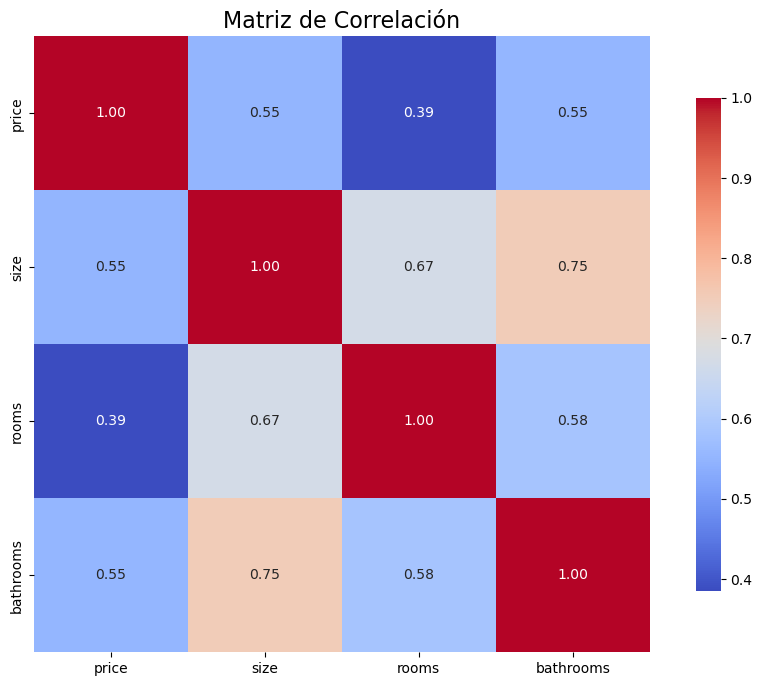

In [447]:
# Filtrar solo columnas numéricas
numeric_df = df_cleaned_final.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8})

# Añadir un título
plt.title('Matriz de Correlación', fontsize=16)
plt.show()


### Normalization of Numerical Columns

- **Min-Max Scaling**:
  - A `MinMaxScaler` object was created to normalize the numerical columns of interest.
  - The selected columns for normalization were `price`, `size`, `rooms`, and `bathrooms`.

- **Normalization Process**:
  - The Min-Max scaling was applied to these columns, transforming their values to a range between 0 and 1.

- **Post-Normalization Data**:
  - The dataset now contains normalized values for the selected columns, which helps improve the performance and consistency of subsequent analyses and machine learning models.

This normalization process ensures that the numerical features are on a similar scale, reducing bias and improving the reliability of future computations.


In [448]:
# Crear un objeto MinMaxScaler
min_max_scaler = MinMaxScaler()

# Seleccionar las columnas a normalizar
columns_to_normalize = ['price', 'size', 'rooms', 'bathrooms']

# Aplicar la normalización
df_cleaned_final[columns_to_normalize] = min_max_scaler.fit_transform(df_cleaned_final[columns_to_normalize])

df_cleaned_final


,location,price,size,rooms,bathrooms,type,region
74019,Centro,0.138728,0.120393,0.666667,0.2,pisos,madrid
74020,Meco,0.098844,0.189189,0.333333,0.4,pisos,madrid
74021,Centro,0.020809,0.049140,0.000000,0.0,pisos,madrid
74022,Moralzarzal,0.260116,0.196560,0.666667,0.2,pisos,madrid
74023,Núcleo Urbano,0.109711,0.036855,0.000000,0.0,pisos,madrid
...,...,...,...,...,...,...,...
495038,Parla Este,0.107514,0.098280,0.333333,0.2,lofts,madrid
495043,Loeches,0.061272,0.122850,0.333333,0.0,lofts,madrid
495050,Ciudalcampo-Fuente del Fresno,0.148208,0.125307,0.000000,0.0,lofts,madrid
495054,Ciudad Jardín,0.439306,0.157248,0.333333,0.2,lofts,madrid


### Perform Train Test Split

### Linear Regression Model for Price Prediction

#### In this section, we defined the features and target variable, preprocessed the data, trained a linear regression model, and evaluated its performance.

In [449]:
# Definir las características (X) y la variable objetivo (y)
X = df_cleaned_final[['location', 'size', 'rooms', 'bathrooms', 'type']]
y = df_cleaned_final['price']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar variables categóricas
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurarse de que ambos conjuntos tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")


Error Cuadrático Medio (MSE): 0.01
Coeficiente de Determinación (R^2): 0.78


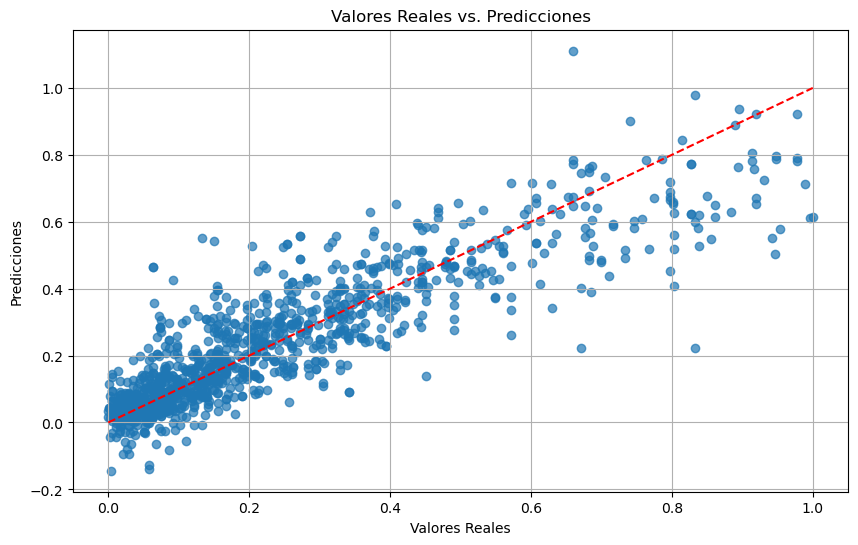

In [450]:
# Graficar valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid()
plt.show()


### Bagging

In [451]:
bagging_model = BaggingRegressor()
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print(f"MSE Bagging: {mse_bagging:.2f}")
print(f"R^2 Bagging: {r2_bagging:.2f}")


MSE Bagging: 0.01
R^2 Bagging: 0.73


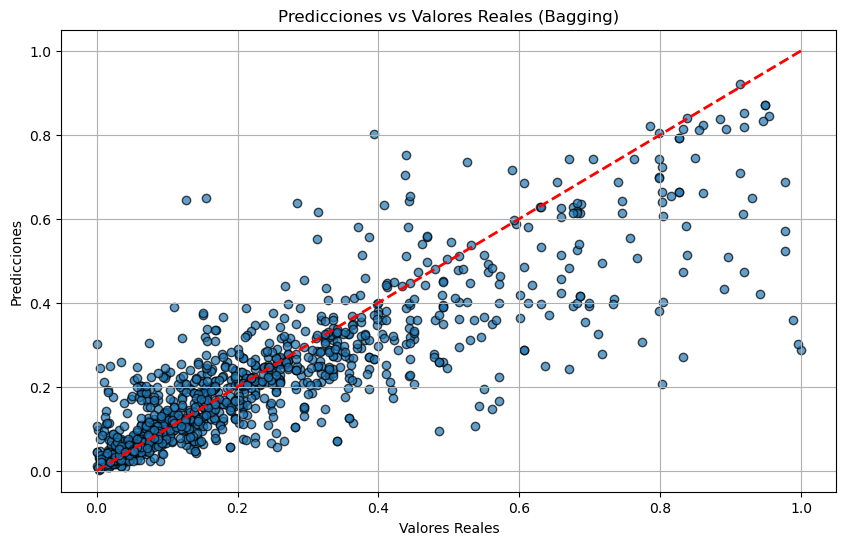

In [452]:
# Graficar Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Bagging)')
plt.grid()
plt.show()


### Random Forests

In [453]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE Random Forest: {mse_rf:.2f}")
print(f"R^2 Random Forest: {r2_rf:.2f}")


MSE Random Forest: 0.01
R^2 Random Forest: 0.75


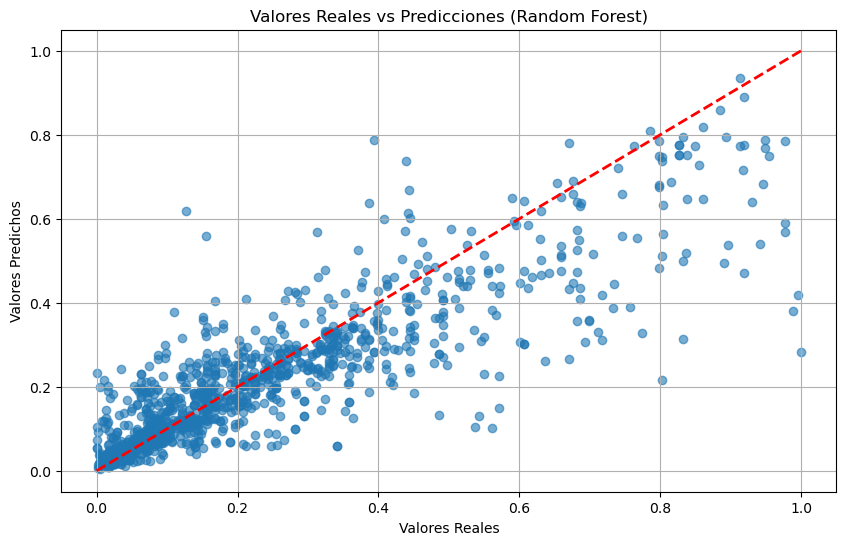

In [454]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title('Valores Reales vs Predicciones (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid()
plt.show()


### Gradient Boosting

In [455]:
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MSE Gradient Boosting: {mse_gb:.2f}")
print(f"R^2 Gradient Boosting: {r2_gb:.2f}")


MSE Gradient Boosting: 0.02
R^2 Gradient Boosting: 0.57


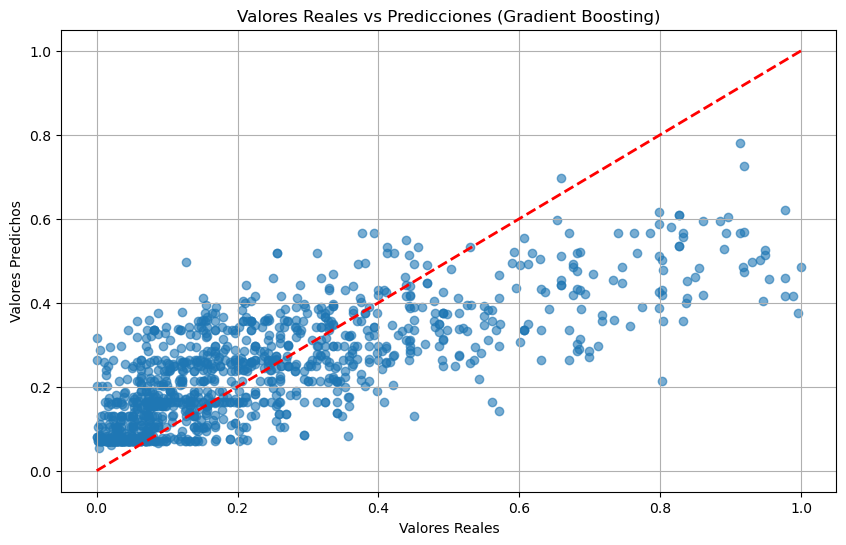

In [456]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title('Valores Reales vs Predicciones (Gradient Boosting)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid()
plt.show()


### Adaptive Boosting (AdaBoost)

In [457]:
ada_boost_model = AdaBoostRegressor()
ada_boost_model.fit(X_train, y_train)
y_pred_ada = ada_boost_model.predict(X_test)

mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"MSE AdaBoost: {mse_ada:.2f}")
print(f"R^2 AdaBoost: {r2_ada:.2f}")


MSE AdaBoost: 0.03
R^2 AdaBoost: 0.34


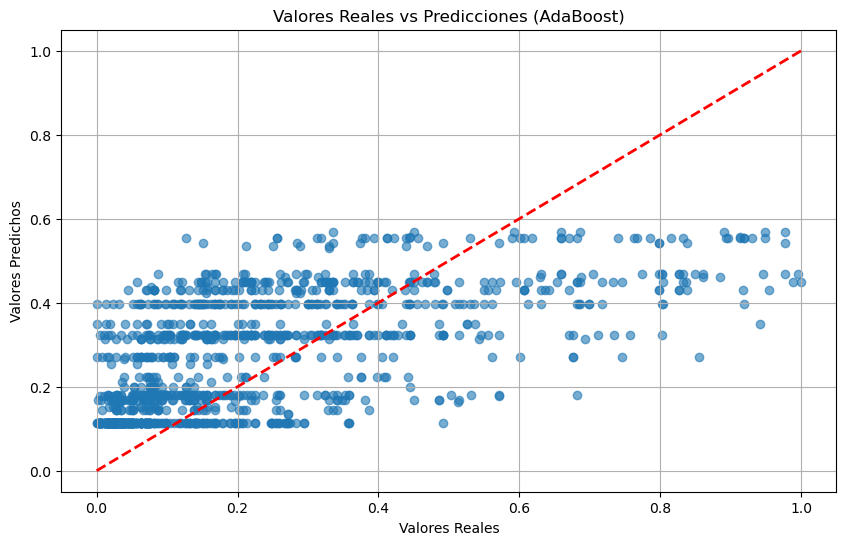

In [458]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ada, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea diagonal
plt.title('Valores Reales vs Predicciones (AdaBoost)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid()
plt.show()


### Mean Absolute Error (MAE) with Scikit-learn 
### This metric helps to understand the overall accuracy of the model’s predictions, where lower values indicate better performance.

In [459]:
y_true = y_test  # Valores reales
y_pred = y_pred_rf  # Predicciones del modelo (por ejemplo, Random Forest)

# Calcular el MAE
mae = mean_absolute_error(y_true, y_pred)

print(f"MAE: {mae:.2f}")


MAE: 0.07
